In [30]:
from skimage.io import imread
from pathlib import Path
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
import cv2
import numpy as np
from tnia.plotting.plt_helper import imshow_multi2d

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_05_12_separate_overlapping')

im = imread(parent_path / 'blobs.tif')

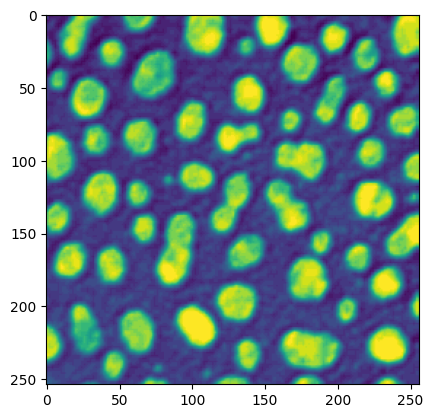

In [31]:
import matplotlib.pyplot as plt

plt.imshow(im)

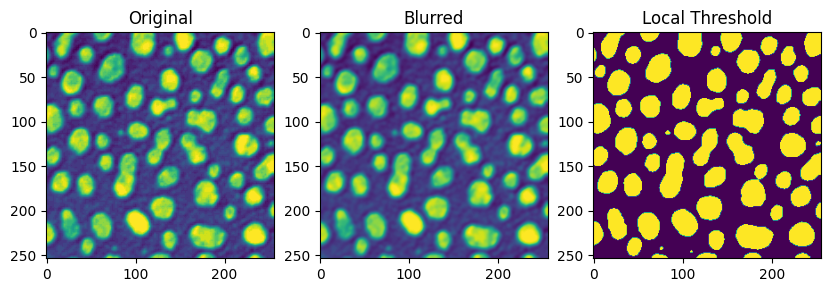

In [32]:
block_size=355
blurred_image = cv2.GaussianBlur(im, (5, 5), 0)
local_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, 1)

fig = imshow_multi2d([im, blurred_image, local_thresh], ['Original', 'Blurred', 'Local Threshold'], 1, 3)

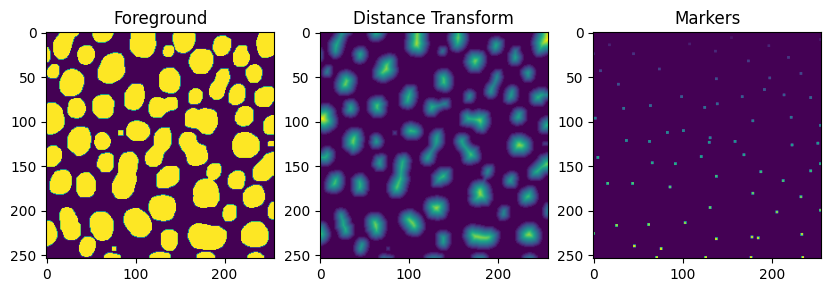

In [35]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(local_thresh, cv2.MORPH_OPEN, kernel, iterations=1)

sure_fg = cv2.dilate(opening, kernel, iterations=1)

dist_transform = cv2.distanceTransform(sure_fg, cv2.DIST_L2, 5)

# threshold distance transform to get peaks
coords = peak_local_max(dist_transform, min_distance=5, exclude_border=False)
mask = np.zeros(dist_transform.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# dilate markers for display
display_markers = cv2.dilate(markers.astype(np.uint8), kernel, iterations=1)

fig = imshow_multi2d([sure_fg, dist_transform, display_markers], ['Foreground', 'Distance Transform', 'Markers'], 1, 3)

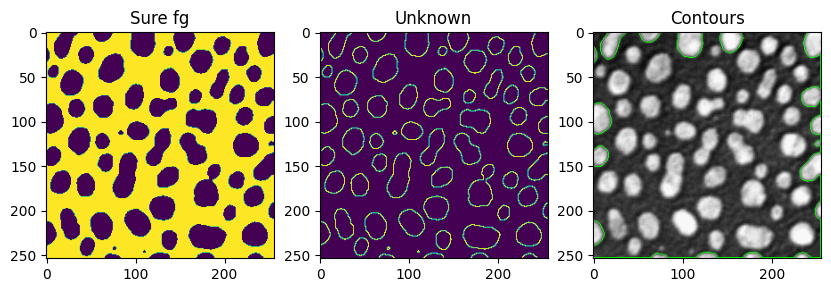

In [9]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

color_image = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color_image, contours, -1, (0, 255, 0), 1) 

fig = imshow_multi2d([sure_fg, unknown, color_image], ['Sure fg','Unknown', 'Contours'], 1, 3)

In [7]:
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness

In [10]:
sure_bg.max()

255

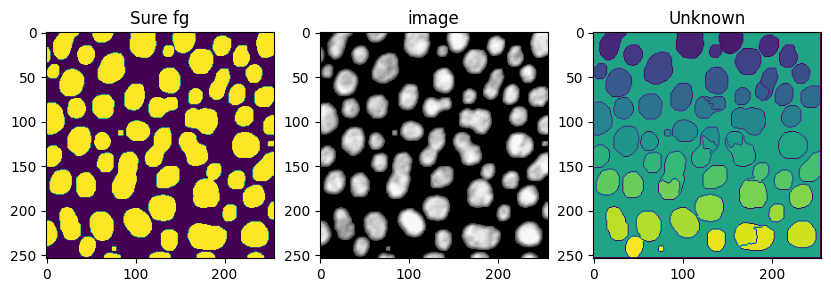

In [51]:
from skimage.feature import peak_local_max
from scipy import ndimage as ndi


imc = cv2.cvtColor((im*sure_fg_).astype('uint8'), cv2.COLOR_GRAY2BGR)
test=cv2.watershed(imc, markers)

fig = imshow_multi2d([sure_fg, imc, test], ['Sure fg','image', 'Unknown'], 1, 3)

In [45]:
import napari
viewer = napari.Viewer()
viewer.add_image(im)
viewer.add_image(sure_fg)
viewer.add_image(im*sure_fg)
viewer.add_image(test)

<Image layer 'test' at 0x1f499d4ad40>

In [48]:
sure_fg.max()
sure_fg_ = sure_fg/255
sure_fg_.max()


1.0